# Affinity Customer Segmentation VS Traditional K-means Customer Segmentation Approach

**This project builds upon the previous Compensatory model. In addition to the product attributes used earlier, we will now incorporate demographic data as well. The demographic variables include: income (measured in thousands of dollars per year), age (in years), sports (1 if the person is sports-active, 0 if not), and gradschl (1 if the person has a master's degree or higher, 0 if not).**

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import random

**Products**

1) $30, 3 hrs, 20 oz, Clean Easy, Leak Resistant, Brand A

2) $10, 1 hrs, 20 oz, Clean Fair, Spill Resistant, Brand B 

Our Candidate   

3) $ 30, 3 hrs, 20 oz, Clean Easy, Leak Resistant, Brand C

**Attributes**

Price: $\$30$, $\$10$, $\$5$

Time Insulated: 0.5 hrs, 1 hrs, 3 hrs

Capacity: 12 oz, 20 oz, 32 oz

Cleanability: Difficult (7 min), Fair (5 min), Easy (2 min)

Containment: Slosh resistant, Spill  resistant, Leak resistant

Brand: A, B, C

**Cost**

Time Insulated: 0.5 hrs costs $\$0.5$, 1 hrs costs $\$1$, 3 hrs costs $\$3$

Capacity: 12 oz costs $\$1.00$, 20 oz costs $\$2.6$,  32 oz costs $\$2.8$

Cleanability: Difficult (7 min) costs $\$1$, Fair (5 min) costs $\$2$.2, Easy (2 min) costs $\$3.0$

Containment: Slosh resistant costs $\$0.5$, Spill resistant costs $\$0.8$, Leak resistant costs $\$1$

In [2]:
df_para_full = pd.read_excel('/Users/haitonghuang/Downloads/mugs-preference-parameters-full (1).xlsx')
df_para_full

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1,5,8,32,7,34,14
1,2,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1,6,3,17,10,51,15
2,3,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7,55,5,5,8,16,9
3,4,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5,12,9,3,40,20,16
4,5,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7,56,6,19,9,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,1,3,7,1,6,7,1,7,6,1,7,7,1,5,7,4,1,7,54,13,6,10,7,10
307,308,1,3,7,1,6,7,1,7,6,1,6,7,1,2,7,7,1,4,8,24,4,39,15,11
308,309,1,6,7,1,5,7,1,7,3,1,2,7,1,3,7,7,3,1,12,34,16,14,13,11
309,310,1,3,7,1,5,7,1,7,1,1,4,7,1,4,7,1,5,7,57,5,5,17,5,10


In [3]:
df_demo = pd.read_excel('/Users/haitonghuang/Downloads/demographics-full.xlsx')
df_demo


,id,income,age,sports,gradschl
0,1,63,46,0,0
1,2,65,48,0,0
2,3,38,37,0,0
3,4,77,58,1,1
4,5,44,41,0,0
...,...,...,...,...,...
306,307,44,40,0,0
307,308,67,51,1,1
308,309,56,43,1,0
309,310,39,39,0,0


In [4]:
# Define attributes
price = df_para_full.iloc[:,1:4]
time = df_para_full.iloc[:,4:7]
capacity = df_para_full.iloc[:,7:10]
cleanability = df_para_full.iloc[:,10:13]
containment = df_para_full.iloc[:,13:16]
brand = df_para_full.iloc[:,16:19]
preference = df_para_full.iloc[:,19:]

In [5]:
# Calculate the probability of purchase for each product by considering customer utilities and applying the logit rule.
prob_A = []
prob_B = []
prob_C = []

for i in range(len(df_para_full)):
    
    utility_A = preference.iloc[i][0] * price.iloc[i][0] + preference.iloc[i][1] * time.iloc[i][2] + preference.iloc[i][2] * capacity.iloc[i][1] \
            +   preference.iloc[i][3] * cleanability.iloc[i][2] + preference.iloc[i][4] * containment.iloc[i][2] + preference.iloc[i][5] * brand.iloc[i][0]
    
    
    utility_B = preference.iloc[i][0] * price.iloc[i][1] + preference.iloc[i][1] * time.iloc[i][1] + preference.iloc[i][2] * capacity.iloc[i][1] \
            +   preference.iloc[i][3] * cleanability.iloc[i][1] + preference.iloc[i][4] * containment.iloc[i][1] + preference.iloc[i][5] * brand.iloc[i][1]
    
    utility_C = preference.iloc[i][0] * price.iloc[i][0] + preference.iloc[i][1] * time.iloc[i][2] + preference.iloc[i][2] * capacity.iloc[i][1] \
            +   preference.iloc[i][3] * cleanability.iloc[i][2] + preference.iloc[i][4] * containment.iloc[i][2] + preference.iloc[i][5] * brand.iloc[i][2]
    
    c = 0.0139
    
    prob_A.append(np.exp(c * utility_A) / (np.exp(c * utility_A) + np.exp(c * utility_B) + np.exp(c * utility_C)))
    
    prob_B.append(np.exp(c * utility_B) / (np.exp(c * utility_A) + np.exp(c * utility_B) + np.exp(c * utility_C)))
    
    prob_C.append(np.exp(c * utility_C) / (np.exp(c * utility_A) + np.exp(c * utility_B) + np.exp(c * utility_C)))
    



In [6]:
probs = pd.DataFrame([np.array(prob_A),np.array(prob_B),np.array(prob_C)]).T.rename({0:'Pa',1:'Pb',2:'Pc'}, axis = 1)

df = pd.concat([df_para_full,df_demo,probs], axis = 1)
df

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,id,income,age,sports,gradschl,Pa,Pb,Pc
0,1,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1,5,8,32,7,34,14,1,63,46,0,0,0.699133,0.083358,0.217509
1,2,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1,6,3,17,10,51,15,2,65,48,0,0,0.486828,0.373833,0.139339
2,3,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7,55,5,5,8,16,9,3,38,37,0,0,0.044053,0.862632,0.093316
3,4,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5,12,9,3,40,20,16,4,77,58,1,1,0.581555,0.045696,0.372749
4,5,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7,56,6,19,9,0,11,5,44,41,0,0,0.155383,0.558187,0.286430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,1,3,7,1,6,7,1,7,6,1,7,7,1,5,7,4,1,7,54,13,6,10,7,10,307,44,40,0,0,0.219821,0.446622,0.333557
307,308,1,3,7,1,6,7,1,7,6,1,6,7,1,2,7,7,1,4,8,24,4,39,15,11,308,67,51,1,1,0.586371,0.042981,0.370648
308,309,1,6,7,1,5,7,1,7,3,1,2,7,1,3,7,7,3,1,12,34,16,14,13,11,309,56,43,1,0,0.671771,0.059819,0.268410
309,310,1,3,7,1,5,7,1,7,1,1,4,7,1,4,7,1,5,7,57,5,5,17,5,10,310,39,39,0,0,0.159755,0.472407,0.367838


In [7]:
df = df.drop('id',axis = 1)

In [8]:
df = df.rename(columns={col: col.strip() for col in df.columns})

In [9]:
def weighted(df,p_column):
    a = {}
    for j in df.columns[1:29]:
        sum_wi = df[p_column].sum()
        for i in range(len(df)):
            product = df.loc[i,j] * df.loc[i,p_column]
            a[j] = a.get(j,0) + (product / sum_wi)
    return pd.DataFrame([a])

weighted(df,'Pc')

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
0,1.0,5.015364,7.0,1.0,3.914222,7.0,3.09642,5.327869,3.879561,1.0,4.870326,7.0,1.0,3.780762,7.0,3.891464,3.608635,4.463887,25.956316,11.138901,12.198223,21.131582,16.648434,12.966477,57.744594,46.474165,0.448355,0.448449


**For product A and product B**

In [10]:
def weighted(df,p_column):
    a = {}
    for j in df.columns[1:29]:
        sum_wi = df[p_column].sum()
        for i in range(len(df)):
            product = df.loc[i,j] * df.loc[i,p_column]
            a[j] = a.get(j,0) + (product / sum_wi)
    return pd.DataFrame([a])


In [11]:
p_name = pd.DataFrame(['A','B','C'],columns = ['Product'])

In [12]:
full_weight_avg = pd.concat([weighted(df,'Pa'),weighted(df,'Pb'),weighted(df,'Pc')]).reset_index()
full_weight_avg = pd.concat([p_name,full_weight_avg],axis = 1).drop('index',axis =1)
full_weight_avg

,Product,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
0,A,1.0,4.919712,7.0,1.0,4.020969,7.0,3.266582,5.366723,3.789008,1.0,4.868968,7.0,1.0,3.850339,7.0,5.430353,3.500536,3.039810,18.042101,13.357271,16.362322,18.474938,20.659395,13.117021,60.168849,46.711944,0.470805,0.359620
1,B,1.0,5.667076,7.0,1.0,4.133307,7.0,3.108500,5.337482,3.970346,1.0,5.037728,7.0,1.0,4.127204,7.0,2.896445,4.608367,4.403673,38.985193,8.963154,12.162438,14.565080,12.399438,12.891366,49.634303,42.848971,0.168093,0.247873
2,C,1.0,5.015364,7.0,1.0,3.914222,7.0,3.096420,5.327869,3.879561,1.0,4.870326,7.0,1.0,3.780762,7.0,3.891464,3.608635,4.463887,25.956316,11.138901,12.198223,21.131582,16.648434,12.966477,57.744594,46.474165,0.448355,0.448449


In [13]:
lis = []
for i in df.columns[1:29]:
    lis.append(df[i].mean())
    
temp = pd.DataFrame(columns = df.columns[1:29])
temp.loc[0] = lis

full_weight_avg = pd.concat([full_weight_avg,temp]).fillna('mean_list')
full_weight_avg = full_weight_avg.reset_index().drop('index',axis =1)
full_weight_avg


,Product,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
0,A,1.0,4.919712,7.0,1.0,4.020969,7.0,3.266582,5.366723,3.789008,1.0,4.868968,7.0,1.0,3.850339,7.0,5.430353,3.500536,3.039810,18.042101,13.357271,16.362322,18.474938,20.659395,13.117021,60.168849,46.711944,0.470805,0.359620
1,B,1.0,5.667076,7.0,1.0,4.133307,7.0,3.108500,5.337482,3.970346,1.0,5.037728,7.0,1.0,4.127204,7.0,2.896445,4.608367,4.403673,38.985193,8.963154,12.162438,14.565080,12.399438,12.891366,49.634303,42.848971,0.168093,0.247873
2,C,1.0,5.015364,7.0,1.0,3.914222,7.0,3.096420,5.327869,3.879561,1.0,4.870326,7.0,1.0,3.780762,7.0,3.891464,3.608635,4.463887,25.956316,11.138901,12.198223,21.131582,16.648434,12.966477,57.744594,46.474165,0.448355,0.448449
3,mean_list,1.0,5.266881,7.0,1.0,4.041801,7.0,3.154341,5.344051,3.890675,1.0,4.942122,7.0,1.0,3.951768,7.0,3.938907,4.006431,3.996785,29.125402,10.887460,13.472669,17.475884,16.057878,12.980707,54.996785,44.983923,0.334405,0.334405


In [14]:
lift = full_weight_avg.copy()

In [15]:
lift

,Product,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
0,A,1.0,4.919712,7.0,1.0,4.020969,7.0,3.266582,5.366723,3.789008,1.0,4.868968,7.0,1.0,3.850339,7.0,5.430353,3.500536,3.039810,18.042101,13.357271,16.362322,18.474938,20.659395,13.117021,60.168849,46.711944,0.470805,0.359620
1,B,1.0,5.667076,7.0,1.0,4.133307,7.0,3.108500,5.337482,3.970346,1.0,5.037728,7.0,1.0,4.127204,7.0,2.896445,4.608367,4.403673,38.985193,8.963154,12.162438,14.565080,12.399438,12.891366,49.634303,42.848971,0.168093,0.247873
2,C,1.0,5.015364,7.0,1.0,3.914222,7.0,3.096420,5.327869,3.879561,1.0,4.870326,7.0,1.0,3.780762,7.0,3.891464,3.608635,4.463887,25.956316,11.138901,12.198223,21.131582,16.648434,12.966477,57.744594,46.474165,0.448355,0.448449
3,mean_list,1.0,5.266881,7.0,1.0,4.041801,7.0,3.154341,5.344051,3.890675,1.0,4.942122,7.0,1.0,3.951768,7.0,3.938907,4.006431,3.996785,29.125402,10.887460,13.472669,17.475884,16.057878,12.980707,54.996785,44.983923,0.334405,0.334405


In [16]:
# Compute the log lift
for i in range(1, len(lift.columns)):
    lift[lift.columns[i]] = np.log10(lift[lift.columns[i]]/lift.iloc[3][i])
    
    
lift

,Product,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
0,A,-4.821637e-17,-0.029614,9.643275e-17,-4.821637e-17,-0.002244,9.643275e-17,0.015185,0.001839,-0.011500,-4.821637e-17,-0.006477,9.643275e-17,-4.821637e-17,-0.011292,9.643275e-17,0.139452,-0.058623,-0.118864,-0.207985,0.088791,0.084391,0.024144,0.109429,0.004537,0.039034,0.016371,0.148568,0.031571
1,B,-3.857310e-16,0.031806,1.928655e-16,-3.857310e-16,0.009723,1.928655e-16,-0.006358,-0.000534,0.008803,-3.857310e-16,0.008321,1.928655e-16,-3.857310e-16,0.018864,1.928655e-16,-0.133510,0.060789,0.042104,0.126628,-0.084466,-0.044433,-0.079126,-0.112286,-0.002999,-0.044555,-0.021117,-0.298723,-0.130045
2,C,-2.892982e-16,-0.021251,-2.410819e-16,-2.892982e-16,-0.013929,-2.410819e-16,-0.008049,-0.001317,-0.001242,-2.892982e-16,-0.006355,-2.410819e-16,-2.892982e-16,-0.019212,-2.410819e-16,-0.005263,-0.045415,0.048002,-0.050029,0.009916,-0.043157,0.082493,0.015685,-0.000476,0.021174,0.014154,0.127349,0.127440
3,mean_list,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
lift.T.to_excel('data2.xlsx', index=True)

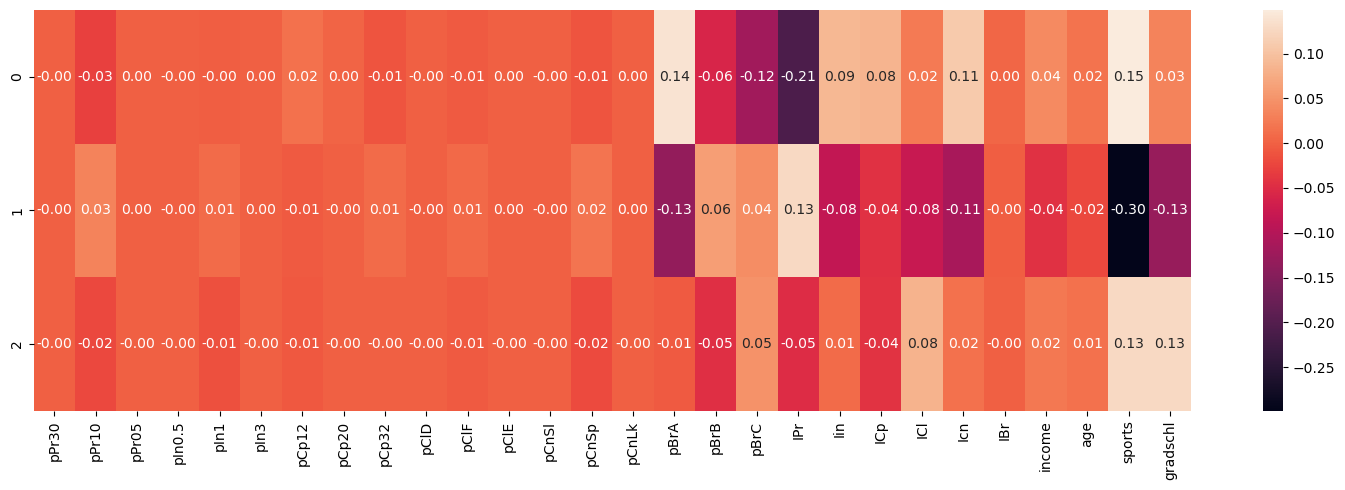

In [18]:
graph = lift.drop('Product',axis =1)

graph = graph.drop(3,axis = 0)

fig, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(graph,annot=True, fmt='.2f', ax=ax)

fig.tight_layout()
plt.show()

**Segment 1:** In Segment 1, consumers tend to be more active on average and have slightly higher incomes, while their education level falls in the middle range. They prioritize containment and prefer leak-resistant products, reflecting their sensitivity to this aspect of product performance. With relatively higher incomes, price sensitivity is lower for Segment 1 consumers, and they also value carrying capacity and insulation in their product choices. Interestingly, Segment 1 consumers appear to be more interested in sports than those in other segments.

**Segment 2:** In terms of demographics, Segment 2 is characterized by consumers who are on average less active. From the table, we can infer that people in Segment 2 tend to be younger and have lower levels of education, likely indicating that they are still pursuing college or even high school. With lower incomes, they are highly price-sensitive and tend to prefer cheaper products. Interestingly, despite their younger age, people in Segment 2 appear to be the least interested in sports. It seems that their primary concern is obtaining products at a low cost, without much consideration for other factors.

**Segment 3:** Segment 3 is characterized by consumers who are also quite active and have the highest education level. They participate in sports and are approximately the same age as those in Segment 1. With mid-level incomes, they are likely to be company employees or have professional occupations. Interestingly, Segment 3 consumers prioritize cleanability over containment, and are not particularly concerned with carrying capacity or time insulation. They are less price-sensitive than those in Segment 1, reflecting their relatively higher income levels.

**Traditional K-means Approach**

In [19]:
np.random.seed(410014)

In [20]:
km_df = df.iloc[:,1:-7]
km_df

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1,5,8,32,7,34,14
1,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1,6,3,17,10,51,15
2,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7,55,5,5,8,16,9
3,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5,12,9,3,40,20,16
4,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7,56,6,19,9,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,3,7,1,6,7,1,7,6,1,7,7,1,5,7,4,1,7,54,13,6,10,7,10
307,1,3,7,1,6,7,1,7,6,1,6,7,1,2,7,7,1,4,8,24,4,39,15,11
308,1,6,7,1,5,7,1,7,3,1,2,7,1,3,7,7,3,1,12,34,16,14,13,11
309,1,3,7,1,5,7,1,7,1,1,4,7,1,4,7,1,5,7,57,5,5,17,5,10


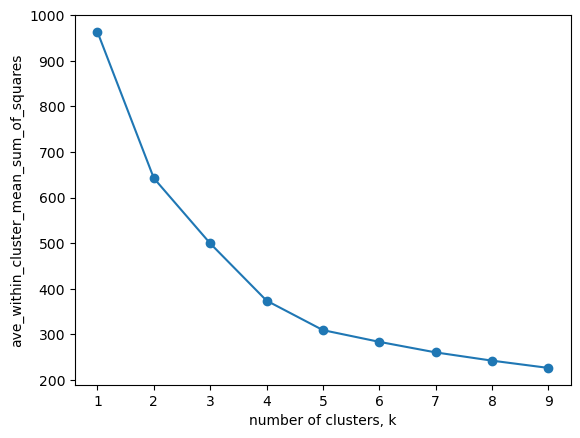

In [21]:
inertias = []
ks = range(1,10)

for k in ks:
    kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeansModel.fit(km_df)
    ave_within_cluster_mean_sum_of_squares = (kmeansModel.inertia_) / km_df.shape[0]
    inertias.append(ave_within_cluster_mean_sum_of_squares)
    

    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('ave_within_cluster_mean_sum_of_squares')
plt.xticks(ks)
plt.show()

In [22]:
demo = df[['income', 'age', 'sports', 'gradschl']]

In [23]:
kmeansModel = KMeans(n_clusters=4, n_init=50, max_iter=100)

kmeansModel.fit(km_df)
labels = kmeansModel.predict(km_df)



km_df = pd.concat([km_df,demo,pd.DataFrame(labels).rename({0:'cluster'},axis =1 )],axis =1)
km_df

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl,cluster
0,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1,5,8,32,7,34,14,63,46,0,0,3
1,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1,6,3,17,10,51,15,65,48,0,0,3
2,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7,55,5,5,8,16,9,38,37,0,0,1
3,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5,12,9,3,40,20,16,77,58,1,1,0
4,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7,56,6,19,9,0,11,44,41,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,3,7,1,6,7,1,7,6,1,7,7,1,5,7,4,1,7,54,13,6,10,7,10,44,40,0,0,1
307,1,3,7,1,6,7,1,7,6,1,6,7,1,2,7,7,1,4,8,24,4,39,15,11,67,51,1,1,0
308,1,6,7,1,5,7,1,7,3,1,2,7,1,3,7,7,3,1,12,34,16,14,13,11,56,43,1,0,2
309,1,3,7,1,5,7,1,7,1,1,4,7,1,4,7,1,5,7,57,5,5,17,5,10,39,39,0,0,1


In [24]:
km_df_mean = km_df.groupby('cluster').mean()
km_df_mean

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.186441,7.0,1.0,3.745763,7.0,3.254237,5.610169,3.457627,1.0,5.271186,7.0,1.0,3.728814,7.0,3.677966,4.288136,3.898305,16.508475,10.813559,8.237288,39.186441,12.271186,12.966102,63.067797,50.203390,0.711864,0.644068
1,1.0,5.558621,7.0,1.0,4.068966,7.0,2.882759,5.055172,4.268966,1.0,4.855172,7.0,1.0,3.917241,7.0,2.579310,4.220690,5.131034,46.068966,8.475862,8.744828,12.689655,11.137931,12.875862,47.372414,42.179310,0.110345,0.282759
2,1.0,4.709091,7.0,1.0,4.272727,7.0,4.109091,5.745455,3.145455,1.0,5.109091,7.0,1.0,3.818182,7.0,5.800000,3.654545,2.436364,12.818182,16.072727,35.345455,11.872727,10.836364,13.018182,60.163636,45.418182,0.436364,0.181818
3,1.0,5.134615,7.0,1.0,4.057692,7.0,2.788462,5.423077,4.115385,1.0,4.634615,7.0,1.0,4.442308,7.0,6.057692,3.461538,2.596154,13.442308,12.211538,9.461538,12.115385,39.596154,13.250000,61.634615,46.423077,0.423077,0.288462


In [25]:
lis2 = []
for i in km_df_mean.columns:
    lis2.append(km_df_mean[i].mean())


    
temp2 = pd.DataFrame(columns = km_df_mean.columns)
temp2.loc[0] = lis2

km_df_mean = pd.concat([km_df_mean,temp2]).reset_index().rename({4:'mean_list'},axis = 0).drop('index',axis = 1)
km_df_mean.index.name = 'cluster'


In [26]:
km_df_mean

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.186441,7.0,1.0,3.745763,7.0,3.254237,5.610169,3.457627,1.0,5.271186,7.0,1.0,3.728814,7.0,3.677966,4.288136,3.898305,16.508475,10.813559,8.237288,39.186441,12.271186,12.966102,63.067797,50.203390,0.711864,0.644068
1,1.0,5.558621,7.0,1.0,4.068966,7.0,2.882759,5.055172,4.268966,1.0,4.855172,7.0,1.0,3.917241,7.0,2.579310,4.220690,5.131034,46.068966,8.475862,8.744828,12.689655,11.137931,12.875862,47.372414,42.179310,0.110345,0.282759
2,1.0,4.709091,7.0,1.0,4.272727,7.0,4.109091,5.745455,3.145455,1.0,5.109091,7.0,1.0,3.818182,7.0,5.800000,3.654545,2.436364,12.818182,16.072727,35.345455,11.872727,10.836364,13.018182,60.163636,45.418182,0.436364,0.181818
3,1.0,5.134615,7.0,1.0,4.057692,7.0,2.788462,5.423077,4.115385,1.0,4.634615,7.0,1.0,4.442308,7.0,6.057692,3.461538,2.596154,13.442308,12.211538,9.461538,12.115385,39.596154,13.250000,61.634615,46.423077,0.423077,0.288462
mean_list,1.0,5.147192,7.0,1.0,4.036287,7.0,3.258637,5.458468,3.746858,1.0,4.967516,7.0,1.0,3.976636,7.0,4.528742,3.906227,3.515464,22.209482,11.893422,15.447277,18.966052,18.460409,13.027536,58.059616,46.055990,0.420412,0.349277


In [27]:
km_df_mean.T.to_excel('data2.xlsx', index=True)

In [28]:
lift2 = km_df_mean.copy()

In [29]:
# Compute the log lift
for i in range(len(lift2.columns)):
    lift2[lift2.columns[i]] = np.log10(lift2[lift2.columns[i]]/lift2.loc['mean_list'][i])
lift2

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.003299,0.0,0.0,-0.032442,0.0,-0.000587,0.011905,-0.034889,0.0,0.025769,0.0,0.0,-0.027945,0.0,-0.090370,0.040511,0.044893,-0.128831,-0.041338,-0.273068,0.315159,-0.177355,-0.002053,0.035934,0.037447,0.228722,0.265762
1,0.0,0.033397,0.0,0.0,0.003502,0.0,-0.053228,-0.033335,0.056655,0.0,-0.009935,0.0,0.0,-0.006536,0.0,-0.244474,0.033626,0.164222,0.316870,-0.147123,-0.247101,-0.174527,-0.219437,-0.005086,-0.088349,-0.038187,-0.580924,-0.091754
2,0.0,-0.038633,0.0,0.0,0.024723,0.0,0.100710,0.022254,-0.075984,0.0,0.012204,0.0,0.0,-0.017659,0.0,0.107450,-0.028924,-0.159241,-0.238712,0.130783,0.359482,-0.203426,-0.231358,-0.000312,0.015460,-0.006056,0.016173,-0.283532
3,0.0,-0.001062,0.0,0.0,0.002297,0.0,-0.067671,-0.002825,0.040743,0.0,-0.030126,0.0,0.0,0.048093,0.0,0.126330,-0.052488,-0.131652,-0.218065,0.011464,-0.212890,-0.194640,0.331412,0.007354,0.025951,0.003448,0.002744,-0.083081
mean_list,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
lift2 = lift2.drop('mean_list',axis = 0)

In [31]:
lift2

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.003299,0.0,0.0,-0.032442,0.0,-0.000587,0.011905,-0.034889,0.0,0.025769,0.0,0.0,-0.027945,0.0,-0.090370,0.040511,0.044893,-0.128831,-0.041338,-0.273068,0.315159,-0.177355,-0.002053,0.035934,0.037447,0.228722,0.265762
1,0.0,0.033397,0.0,0.0,0.003502,0.0,-0.053228,-0.033335,0.056655,0.0,-0.009935,0.0,0.0,-0.006536,0.0,-0.244474,0.033626,0.164222,0.316870,-0.147123,-0.247101,-0.174527,-0.219437,-0.005086,-0.088349,-0.038187,-0.580924,-0.091754
2,0.0,-0.038633,0.0,0.0,0.024723,0.0,0.100710,0.022254,-0.075984,0.0,0.012204,0.0,0.0,-0.017659,0.0,0.107450,-0.028924,-0.159241,-0.238712,0.130783,0.359482,-0.203426,-0.231358,-0.000312,0.015460,-0.006056,0.016173,-0.283532
3,0.0,-0.001062,0.0,0.0,0.002297,0.0,-0.067671,-0.002825,0.040743,0.0,-0.030126,0.0,0.0,0.048093,0.0,0.126330,-0.052488,-0.131652,-0.218065,0.011464,-0.212890,-0.194640,0.331412,0.007354,0.025951,0.003448,0.002744,-0.083081


In [32]:
lift2.T.to_excel('data3.xlsx', index=True)

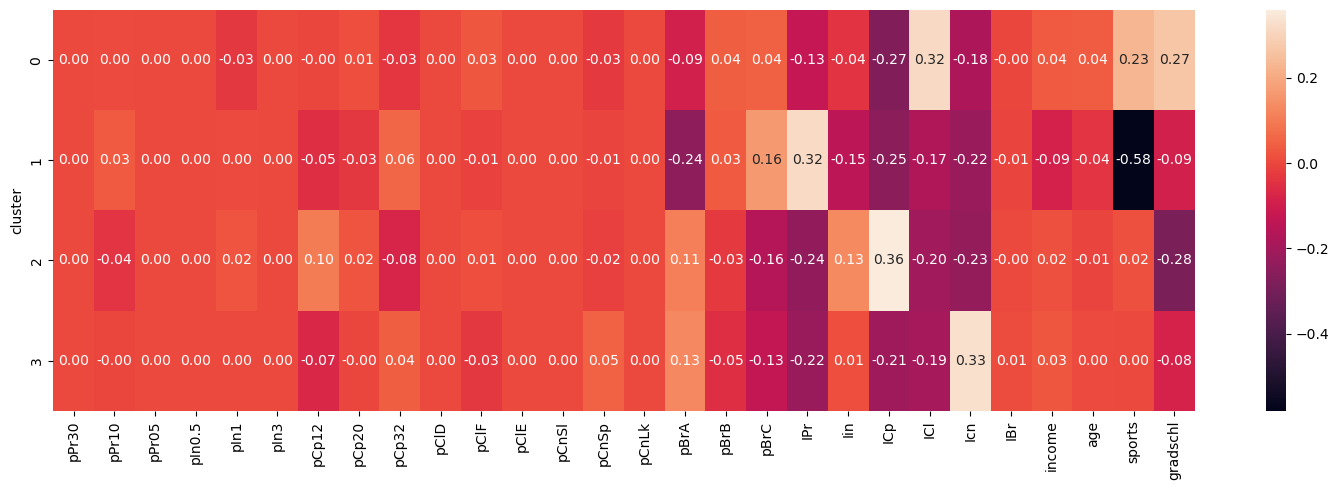

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(lift2,annot=True, fmt='.2f', ax=ax)

fig.tight_layout()
plt.show()

**Segment 1:** People in Segment 1 are the most highly educated, and they are also avid sports enthusiasts. They tend to be more senior than those in other segments, and as a result, they have the highest income level. Segment 1 consumers are less sensitive to factors such as containment capacity, price, and time insulation, but they do prioritize products with high cleanability.

**Segment 2:** People in Segment 2 are the least active of all the segments, and they are not typically interested in sports. They are the youngest on average, likely indicating that they are still pursuing their education. With the lowest income level among all the segments, they are highly price-sensitive and do not prioritize brand recognition or other factors.

**Segment 3:** People in Segment 3 have a lower education level compared to those in Segment 1, but they are relatively active and enjoy sports. They are slightly older than those in Segment 2, but still a relatively young group. Unlike Segment 2, people in Segment 3 are not highly price-sensitive. They prioritize carrying capacity and time insulation, likely reflecting their active lifestyle.

**Segment 4:** People in Segment 4 have a similar education level to those in Segment 2, and they are generally neutral toward sports. They have mid-level incomes and are brand-aware, indicating that they may be loyal customers. They are highly sensitive to containment, while not particularly sensitive to price, cleanability, or time insulation.